In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train[0].shape

(28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

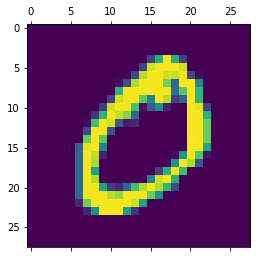

In [11]:
 plt.matshow(x_train[1])

In [13]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
x_train=x_train/255
x_test=x_test/255


In [23]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_train_flattened.shape

(60000, 784)

In [24]:
 model= keras.Sequential([
     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
 ])
model.compile( 
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4737 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9258


In [25]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.9261


[0.26913702487945557, 0.9261000156402588]

In [26]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

array([4.18996811e-02, 4.45656525e-07, 4.67638969e-02, 9.61061060e-01,
       2.86462903e-03, 1.57750130e-01, 2.22563654e-06, 9.99872267e-01,
       1.13581896e-01, 6.98140740e-01], dtype=float32)

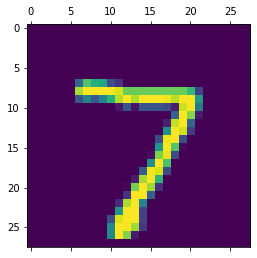

In [28]:
plt.matshow(x_test[0])

In [29]:
y_test[0]

7

In [30]:
y_predicted_labels=[ np.argmax(i) for i in y_predicted ]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   8,    9,  911,   18,    9,    5,   13,   12,   44,    3],
       [   4,    0,   15,  917,    0,   30,    2,   12,   22,    8],
       [   2,    1,    2,    1,  920,    0,   11,    4,    9,   32],
       [  11,    2,    2,   24,    8,  787,   15,    8,   29,    6],
       [  11,    3,    5,    1,    7,   14,  913,    2,    2,    0],
       [   2,    5,   21,    5,    4,    0,    0,  961,    4,   26],
       [   9,    7,    5,   19,    9,   29,   10,   13,  863,   10],
       [  11,    7,    1,    8,   26,    9,    0,   28,    5,  914]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

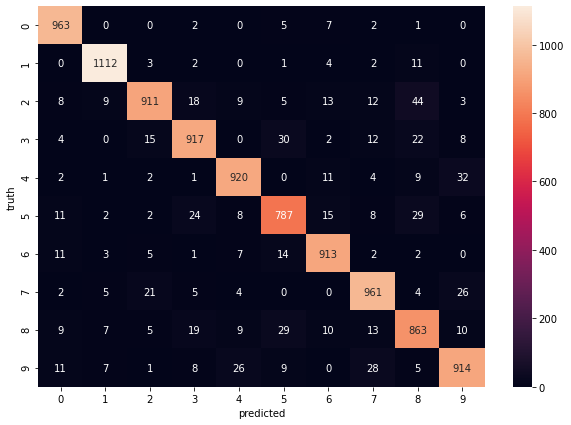

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")

In [35]:
model= keras.Sequential([
     keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
 ])
model.compile( 
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2763 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1296 - accuracy: 0.9615
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0901 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0684 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9837


In [38]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0788 - accuracy: 0.9736


[0.07879437506198883, 0.9735999703407288]

In [39]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

array([2.5344789e-03, 8.8259578e-03, 6.5400195e-01, 8.1694686e-01,
       2.1536942e-05, 4.2417645e-04, 3.0444016e-07, 9.9995971e-01,
       9.7747236e-02, 4.1236401e-02], dtype=float32)

In [42]:
y_predicted_labels=[ np.argmax(i) for i in y_predicted ]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [43]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    1,    0,    1,    1,    2,    4,    0],
       [   0, 1123,    2,    1,    0,    0,    3,    1,    5,    0],
       [   6,    3,  992,    8,    4,    0,    2,   10,    6,    1],
       [   0,    0,    3,  997,    0,    2,    1,    3,    4,    0],
       [   2,    0,    2,    1,  945,    1,    5,    3,    1,   22],
       [   2,    0,    0,   17,    2,  855,    6,    1,    8,    1],
       [   7,    3,    1,    1,    2,    4,  937,    1,    2,    0],
       [   0,    7,    7,    4,    1,    0,    1,  999,    2,    7],
       [   3,    0,    1,    6,    2,    2,    2,    4,  953,    1],
       [   6,    3,    0,    8,    5,    5,    1,   11,    6,  964]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

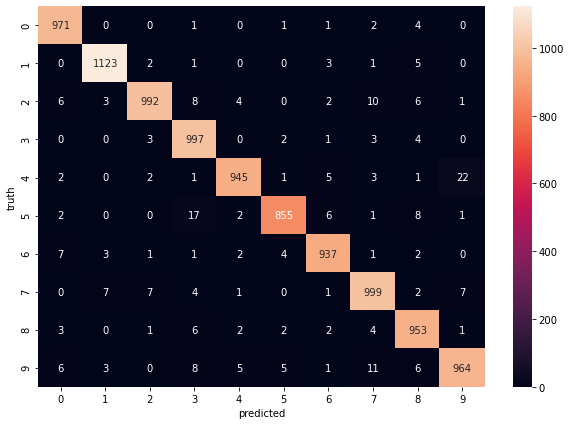

In [44]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")

In [45]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(100,activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
 ])
model.compile( 
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2697 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1250 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0678 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0532 - accuracy: 0.9833
